In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [8]:
X, y = mglearn.datasets.make_forge()

In [12]:
X.shape, y.shape

((26, 2), (26,))

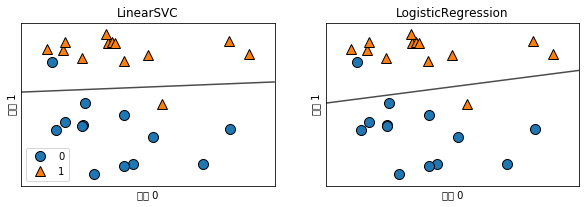

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

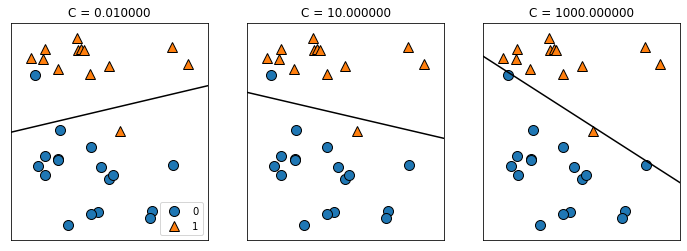

In [28]:
# logistic regression의 경우 'C' 매개변수 조정을 통해 과대적합 과소적합을 조정하며,
# C 값이 커질수록 과대적합, C 값이 작아질 수록 과소적합으로 조정된다.
# sklearn에서 C의 기본 값은 '1.0' 임
# 이는 linear regression L1(lasso), L2(Ridge)의 alpha 매겨변수와 정반대의 로직이다
mglearn.plots.plot_linear_svc_regularization()

In [34]:
# 다른 데이터를 활용해서 좀 더 살펴보자
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [38]:
# C=1 일때의 값
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련세트점수:{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트세트점수:{:.3f}".format(logreg.score(X_test, y_test)))

훈련세트점수:0.953
테스트세트점수:0.958


In [40]:
# C=100 일때의 값
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련세트점수:{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트세트점수:{:.3f}".format(logreg100.score(X_test, y_test)))

훈련세트점수:0.972
테스트세트점수:0.965


In [42]:
# C=0.01 일때의 값
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련세트점수:{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트세트점수:{:.3f}".format(logreg001.score(X_test, y_test)))

훈련세트점수:0.934
테스트세트점수:0.930


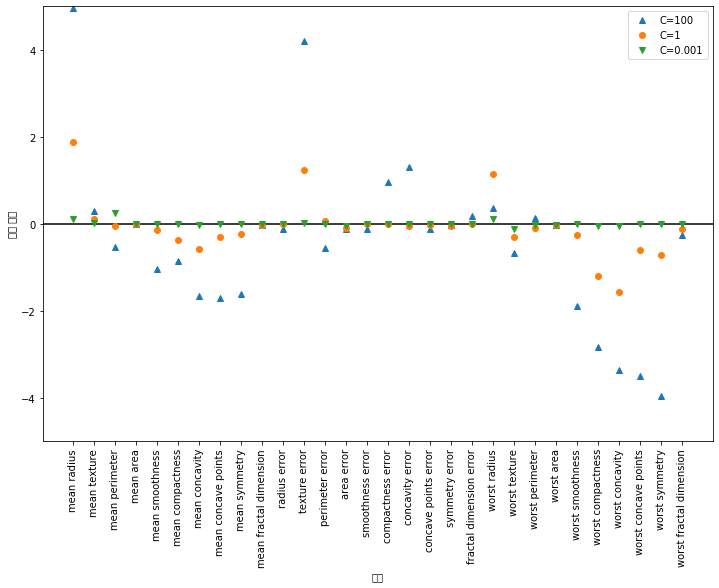

In [53]:
# logistic regression의 규제는 default로 L2 규제가 적용됨 즉 regulation을 강하게 줘도 계수가 0이 되는 경우가 없음
fig = plt.figure(figsize=(12,8))
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()